In [1]:
import gymnasium as gym
from BasicDQN.DQN import DQN as MyDQN
from stable_baselines3.dqn import DQN as SB3DQN
from stable_baselines3.common.monitor import Monitor
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\envs\registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


In [6]:
base_params = dict(
    learning_rate = 0.001,
    buffer_size = 1_000_000,
    learning_starts = 1_000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 1_000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 0.1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 1,
)

In [7]:
ITERACION_ACTUAL = 5
N_RUNS = 5
TOTAL_TIMESTEPS = 300_000

In [8]:
for run in range(ITERACION_ACTUAL, ITERACION_ACTUAL + N_RUNS):
    print(f"Ejecutando corrida {run}/{ITERACION_ACTUAL + N_RUNS - 1}")

    # Crear entorno y monitor con nombre único por corrida
    env_basic = Monitor(gym.make("MountainCar-v0"), filename=f"comparacion_sb3/monitor_basic_{run}")
    env_ngu = Monitor(gym.make("MountainCar-v0"), filename=f"comparacion_sb3/monitor_ngu_{run}")

    agent_sb3 = SB3DQN("MlpPolicy",env_ngu, **base_params)
    agent_sb3.learn(total_timesteps=TOTAL_TIMESTEPS, log_interval=1000)

    base_copy_params = copy.deepcopy(base_params)

    agent_my_dqn = MyDQN(env_basic, **base_copy_params)
    agent_my_dqn.learn(total_timesteps=TOTAL_TIMESTEPS, log_interval=1000)   

Ejecutando corrida 5/10
Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 198      |
|    ep_rew_mean      | -198     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 1032     |
|    time_elapsed     | 189      |
|    total_timesteps  | 195450   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0153   |
|    n_updates        | 48612    |
----------------------------------
--------------------------------
| rollout/            |        |
|    ep_len_mean      | 129    |
|    ep_rew_mean      | -129   |
|    exploration_rate | 0.100  |
| time/               |        |
|    episodes         | 1000   | 
|    fps              | 1324   |
|    time_elapsed     | 128    |
|    total_timesteps  | 170300 |
| train/              |        |
|    learning_rate    | 0.001  |
| 

C:\Users\juan_\AppData\Local\Temp\ipykernel_8744\1626279063.py:24: RuntimeWarning: Mean of empty slice
  sb3_mean = np.nanmean(sb3_matrix, axis=0)


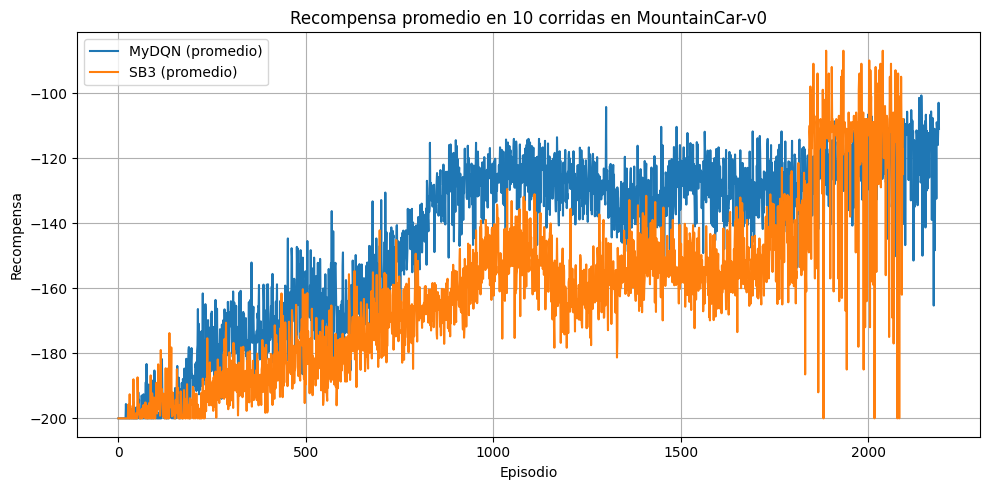

In [13]:
n_archivos = 10

mydqn_rewards = []
sb3_rewards = []

# Leer recompensas
for i in range(0, n_archivos):
    rb = pd.read_csv(f"comparacion_sb3/monitor_basic_{i}.monitor.csv", skiprows=1)["r"].values
    rn = pd.read_csv(f"comparacion_sb3/monitor_ngu_{i}.monitor.csv", skiprows=1)["r"].values

    mydqn_rewards.append(rb)
    sb3_rewards.append(rn)

max_len = max(max(len(r) for r in mydqn_rewards), max(len(r) for r in sb3_rewards))

def pad_to(arr, length):
    return np.pad(arr, (0, length - len(arr)), constant_values=np.nan)

mydqn_matrix = np.vstack([pad_to(r, max_len) for r in mydqn_rewards])
sb3_matrix   = np.vstack([pad_to(r, max_len) for r in sb3_rewards])

# Calcular promedios ignorando NaNs
mydqn_mean = np.nanmean(mydqn_matrix, axis=0)
sb3_mean = np.nanmean(sb3_matrix, axis=0)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(mydqn_mean, label="MyDQN (promedio)")
plt.plot(sb3_mean, label="SB3 (promedio)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.title(f"Recompensa promedio en {n_archivos} corridas en MountainCar-v0")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()